In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

## Motivations:

## Data:

### The data columns are:

1) Pregnancy
2) Glucose
3) Blood Pressure
4) SkinThickness
5) Insulin
6) BMI
7) DiabetesPedigreeFunction
8) Age
9) Outcome

We'll be using the other columsn to predict feature 9: Diabetes diagnoses (0, 1) where 0 = No, 1 = Yes

### Loading dataset:

In [2]:
data = pd.read_csv('../data/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
from pathlib import Path
from cycler import cycler

IMG_PATH = Path() /'images'
IMG_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMG_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#source: Ageron handson-ml3

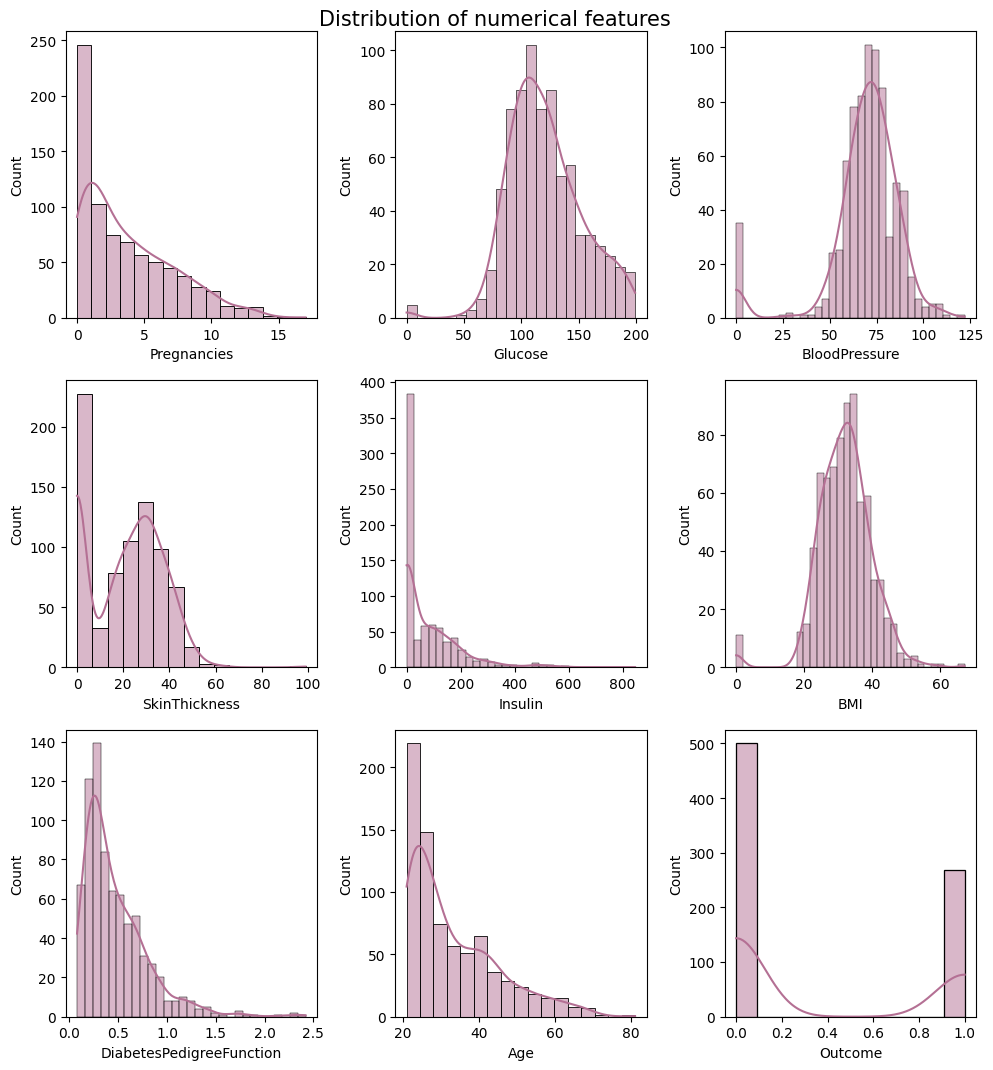

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

cols = data.columns 

plt.figure(figsize=(10, 14))
plt.suptitle('Distribution of numerical features', fontsize='15')
plt.subplots_adjust(top=0.93, wspace=1)


for i in range(len(data.columns)):
    plt.subplot(4, 3, i+1)
    sns.histplot(x=data[cols[i]], kde=True, color='#B47094')

save_fig('numeric_features_distplots')
plt.show();

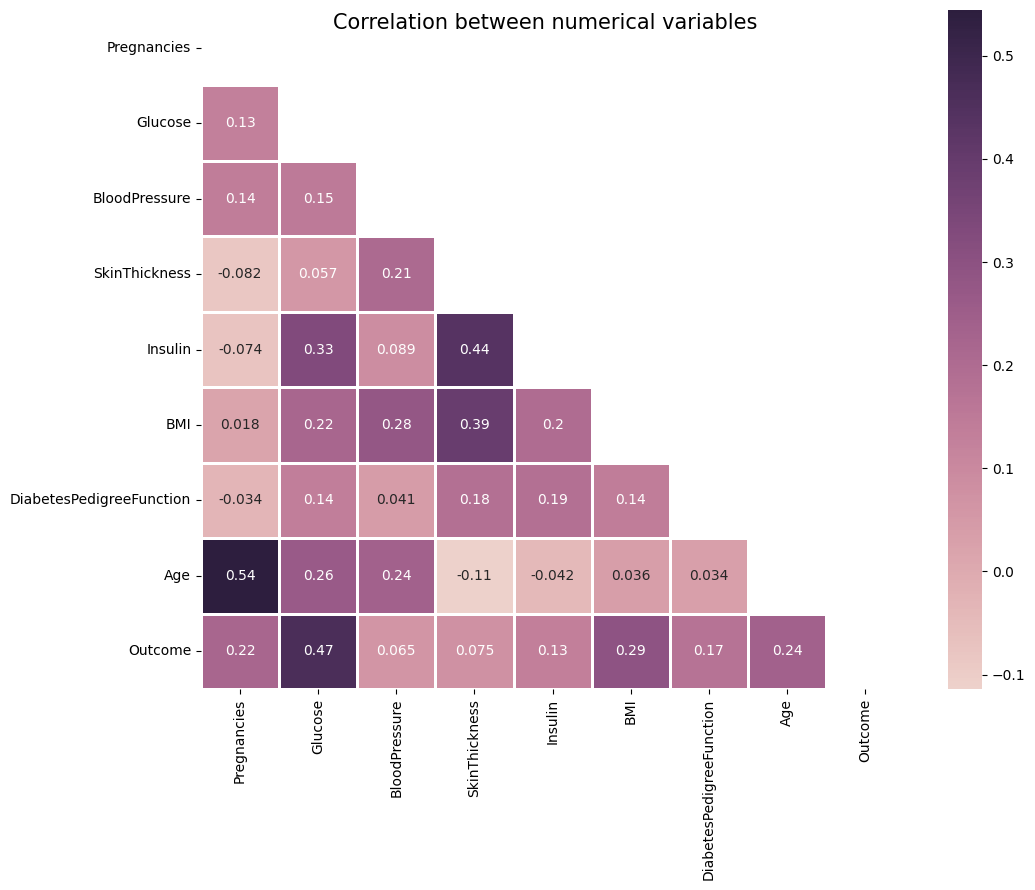

In [33]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
corr_plot = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
           cmap=sns.cubehelix_palette(as_cmap=True), mask=mask, cbar=True, 
            linecolor='white', linewidth=2)  ##.set(title='Correlation between numerical variables')
save_fig('feature_correlations')
f.suptitle('Correlation between numerical variables', fontsize='15');

## Standardizing data 

In [9]:
scaler = StandardScaler()

Drop the 'Outcome' column, and fit the rest of the data

In [10]:
scaler.fit(data.drop('Outcome',axis=1))


StandardScaler()

In [11]:
scaled_feats = scaler.transform(data.drop('Outcome', axis=1))

In [12]:
scaled_df = pd.DataFrame(scaled_feats)
scaled_df.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [13]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


## Train/Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = scaled_df
y = data['Outcome']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

## Building Model

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

## Evaluation Model

In [19]:
predictions = knn.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[79 20]
 [23 32]]


In [21]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.77      0.80      0.79        99
           1       0.62      0.58      0.60        55

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



### Let's break down the significance of the confusion matrix and classification report from above:


### Confusion Matrix
The confusion matrix breakds down the way our model classified the data: 

True Positive (TP): Model predicted positive diabetes outcome, correctly.</br>
False Positive (FP): Model Predicted positive diabetic outcome, incorrectly.</br>
True Negative (TN): Model predicted negative diabetes outcome, correctly.</br>
False Negative (FN): Model predicated negative diabetes outcome, incorrectly.</br>

                     Predicted
                     
                       1    0
     
                   1   TP | FN (Recall)
         Actual
                   0   FP | TN
                 (Precision)

Our model classified:
* 79 True Positive diabetes outcome, patients that our model correctly and identified as having diabetic
* 23 False Positive diabetes outcome, patients that the model incorrectly predicted as diabetics but were not 
* 20 False Negative diabetes outcome, patients that our model incorrectly identifeid as not having diabetes but did have it 
* 32 True Negative diabetes outcome, patients the model correctly identified as not having diabetes, and there was no disease


### Classification Report 
**Precision** measures our model's ability to correctly distinguish positive outcomes. Meaning, out of all the values that our model classified as positive, how many of them were actually positive?

Precision = TP/TP+FP = 79/79+20 = 79/99 = 0.7979% 
This means that out of all the positive classifications our model made, about 80% of them were positive diabetic outcomes. 
*Looks at the positive class* 

**Recall** measures the correct positive predictions our model made out of all the positive cases. In other words, it takes all of the positive cases in the dataset, and measures our model's predicted cases against the total number of positive cases (True Positives and False Negatives).

Recall = TP/TP+FN = 79/79+23 = 79/102 = 0.7745%
This means that our model can classify positive diabetes instances about 77% of the time. To compute this, we measure the True Positive diabetes cases over the total number of actual positive cases found in the dataset, including the False Negatives that our model didn't classify as positive.
*Looks at actual positive cases*


Which one of these measures is most important? The answer to this question varies on the problem and the most important piece of knowledge that you can get from the model. For example, in this case, the most important factor is determining who has diabetes. Therefore, our priority is to focus on the correct diabetes classification, and false negatives (those the model said that didn't have diabetes but did). These are the most important classes because early intervention efforts produce better patient outcomes. 

In other words, we need to know who is diabetic so we can provide the appropriate attention and care. If our model identifies a few people as diabetic that didn't end up having diabetes, it's not a big deal since it's better to be safe than sorry for in a harm reduction approach (Recall). On the other hand, our model can be quite efficient if it correctly detects a high number of diabetic patients out of all of the patients it assigns to the positive class (Precision). How can we find a balance between the two?
 

**F1-score**
F1-scores combines both Precision and Recall to evaluate the model's performance. It is the harmonic mean of both Precision and Recall, and comes in useful when it is important for us to find a balance between the two. 

F-score = 2*(precision * recall) / (precision + recall). 


In our case, a balance would be nice but high recall would be better. Let's see if we can achieve higher recall in our model.

## Choosing K Value

Plotting errors to find a good *K* value: Our goal is to find the K value that produces the least amount of errors

In [22]:
from sklearn import metrics

errors = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    errors.append(np.mean(predictions != y_test))

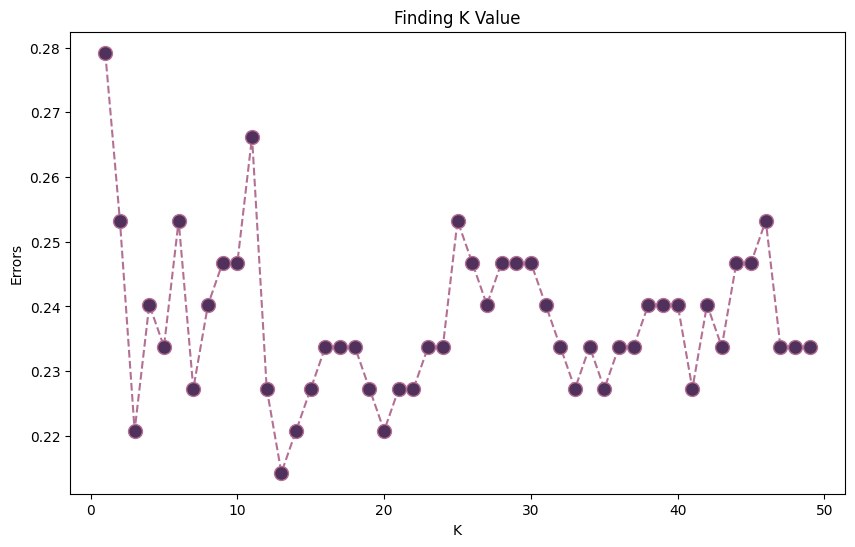

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),errors,color='#B47094', linestyle='dashed', marker='o',
         markerfacecolor='#4F315C', markersize=10)
plt.title('Finding K Value')
plt.xlabel('K')
plt.ylabel('Errors');

In [30]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [31]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[92  7]
 [26 29]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        99
           1       0.81      0.53      0.64        55

    accuracy                           0.79       154
   macro avg       0.79      0.73      0.74       154
weighted avg       0.79      0.79      0.77       154



## Conclusion

[Source 1](https://towardsdatascience.com/confusion-matrix-and-class-statistics-68b79f4f510b)</br>
[Source 2](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)</br>
[Source 3](https://medium.com/codex/diabetes-predication-system-with-knn-algorithm-e040999229f7)</br>
[Source 4](https://pub.towardsai.net/5-steps-to-build-a-knn-classifier-d0fd102b28b5)</br>
